In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import LeaveOneOut
import matplotlib
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


## Wine data

In [12]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [13]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1)

k=1 --> train_accuracy: 0.7083333333333334
k=1 --> valid_accuracy: 1.0
k=1 --> test_accuracy : 0.8333333333333334
k=2 --> train_accuracy: 0.6805555555555556
k=2 --> valid_accuracy: 0.9375
k=2 --> test_accuracy : 0.7777777777777778
k=3 --> train_accuracy: 0.6875
k=3 --> valid_accuracy: 0.875
k=3 --> test_accuracy : 0.7777777777777778


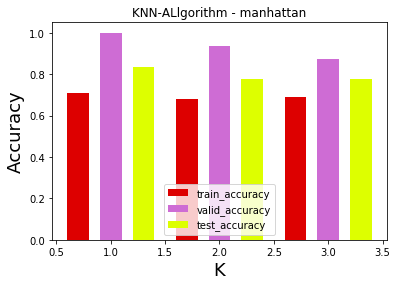

In [14]:
x_train1,x_valid,y_train1,y_valid=train_test_split(x_train,y_train,test_size=0.1)

x=[1,2,3]

# k=1
knn1= KNeighborsClassifier(n_neighbors = 1,p=2,metric='manhattan')
knn1.fit(x_train1,y_train1)
knn1.fit(x_valid,y_valid)
knn1.predict(x_test)


train_accuracy=knn1.score(x_train1,y_train1)
valid_accuracy=knn1.score(x_valid,y_valid)
test_accuracy=knn1.score(x_test,y_test)

plt.bar(x[0]-0.3,train_accuracy,width=0.2,color='#dd0000')
plt.bar(x[0],valid_accuracy,width=0.2,color='#ce6cd4')
plt.bar(x[0]+0.3,test_accuracy,width=0.2,color='#ddff00')

print("k=1 --> train_accuracy:",train_accuracy)
print("k=1 --> valid_accuracy:",valid_accuracy)
print("k=1 --> test_accuracy :",test_accuracy)





# k=2
knn1= KNeighborsClassifier(n_neighbors = 2,p=2,metric='manhattan')
knn1.fit(x_train1,y_train1)
knn1.fit(x_valid,y_valid)
knn1.predict(x_test)


train_accuracy=knn1.score(x_train1,y_train1)
valid_accuracy=knn1.score(x_valid,y_valid)
test_accuracy=knn1.score(x_test,y_test)

plt.bar(x[1]-0.3,train_accuracy,width=0.2,color='#dd0000')
plt.bar(x[1],valid_accuracy,width=0.2,color='#ce6cd4')
plt.bar(x[1]+0.3,test_accuracy,width=0.2,color='#ddff00')

print("k=2 --> train_accuracy:",train_accuracy)
print("k=2 --> valid_accuracy:",valid_accuracy)
print("k=2 --> test_accuracy :",test_accuracy)


#k=3
knn1= KNeighborsClassifier(n_neighbors = 3,p=2,metric='manhattan')
knn1.fit(x_train1,y_train1)
knn1.fit(x_valid,y_valid)
knn1.predict(x_test)


train_accuracy=knn1.score(x_train1,y_train1)
valid_accuracy=knn1.score(x_valid,y_valid)
test_accuracy=knn1.score(x_test,y_test)

plt.bar(x[2]-0.3,train_accuracy,width=0.2,color='#dd0000')
plt.bar(x[2],valid_accuracy,width=0.2,color='#ce6cd4')
plt.bar(x[2]+0.3,test_accuracy,width=0.2,color='#ddff00')

print("k=3 --> train_accuracy:",train_accuracy)
print("k=3 --> valid_accuracy:",valid_accuracy)
print("k=3 --> test_accuracy :",test_accuracy)



plt.title('KNN-ALlgorithm - manhattan')
plt.legend(['train_accuracy','valid_accuracy','test_accuracy'],loc='lower center')

plt.xlabel('K',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()

k=1 --> loo.mean :  0.8375
k=1 --> kfold.mean :  0.8
k=1 --> test_accuracy: 0.8888888888888888
k=2 --> loo.mean :  0.74375
k=2 --> kfold.mean :  0.71875
k=2 --> test_accuracy: 0.8333333333333334
k=3 --> loo.mean :  0.8
k=3 --> kfold.mean :  0.76875
k=3 --> test_accuracy: 0.7777777777777778


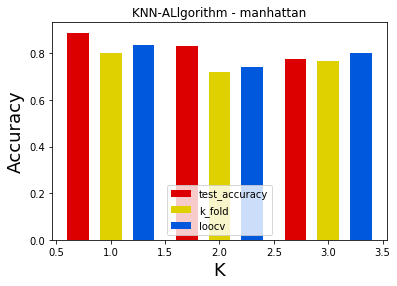

In [16]:

x=[1,2,3]

# k=1
knn1= KNeighborsClassifier(n_neighbors = 1,p=2,metric='manhattan')
knn1.fit(x_train,y_train)
knn1.predict(x_test)

validation_accuracy=knn1.score(x_train,y_train)

test_accuracy=knn1.score(x_test,y_test)
score_kfold=cross_val_score(knn1,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(knn1,x_train,y_train,cv=loo)

plt.bar(x[0]-0.3,test_accuracy,width=0.2,color='#dd0000')
plt.bar(x[0],score_kfold.mean(),width=0.2,color='#dfd000')
plt.bar(x[0]+0.3,score_loo.mean(),width=0.2,color='#0058dd')


print("k=1 --> loo.mean : ",score_loo.mean())
print("k=1 --> kfold.mean : ",score_kfold.mean())
print("k=1 --> test_accuracy:",test_accuracy)



# k=2
knn1= KNeighborsClassifier(n_neighbors = 2,p=2,metric='manhattan')
knn1.fit(x_train,y_train)
knn1.predict(x_test)

validation_accuracy=knn1.score(x_train,y_train)

test_accuracy=knn1.score(x_test,y_test)
score_kfold=cross_val_score(knn1,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(knn1,x_train,y_train,cv=loo)

plt.bar(x[1]-0.3,test_accuracy,width=0.2,color='#dd0000')
plt.bar(x[1],score_kfold.mean(),width=0.2,color='#dfd000')
plt.bar(x[1]+0.3,score_loo.mean(),width=0.2,color='#0058dd')


print("k=2 --> loo.mean : ",score_loo.mean())
print("k=2 --> kfold.mean : ",score_kfold.mean())
print("k=2 --> test_accuracy:",test_accuracy)


#k=3
knn1= KNeighborsClassifier(n_neighbors = 3,p=2,metric='manhattan')
knn1.fit(x_train,y_train)
knn1.predict(x_test)

validation_accuracy=knn1.score(x_train,y_train)

test_accuracy=knn1.score(x_test,y_test)
score_kfold=cross_val_score(knn1,x_train,y_train,cv=10)
loo=LeaveOneOut()
score_loo=cross_val_score(knn1,x_train,y_train,cv=loo)

plt.bar(x[2]-0.3,test_accuracy,width=0.2,color='#dd0000')
plt.bar(x[2],score_kfold.mean(),width=0.2,color='#dfd000')
plt.bar(x[2]+0.3,score_loo.mean(),width=0.2,color='#0058dd')

print("k=3 --> loo.mean : ",score_loo.mean())
print("k=3 --> kfold.mean : ",score_kfold.mean())
print("k=3 --> test_accuracy:",test_accuracy)


plt.title('KNN-ALlgorithm - manhattan')
plt.legend(['test_accuracy','k_fold','loocv'],loc='lower center')

plt.xlabel('K',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.show()
